In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("193398-differ-3bin.csv")

In [3]:
import ast

In [4]:
df.feature_distance = df.feature_distance.apply(ast.literal_eval)

In [5]:
def tryle(s):
    try:
        return ast.literal_eval(s)
    except:
        return "malformed"

In [6]:
df.subset_distances = df.subset_distances.apply(tryle)

In [7]:
df = df[df.subset_distances!="malformed"]

In [8]:
df.subset_distances.apply(len).value_counts()

3    1141520
2      21028
Name: subset_distances, dtype: int64

In [9]:
def tablegen(cfeat):
    tmp = df[df.candidate_feature==cfeat]
    odist = round(tmp.feature_distance.iloc[0][1], 2)
    
    tmp = tmp[['interacting_feature','subset_distances']]
    intfs = []
    ssds = []
    ssss = []
    for i in tmp.index:
        intf = tmp.interacting_feature.loc[i]
        ssd = tmp.subset_distances.loc[i]
        n = len(ssd)
        for j in range(n):
            intfs.append(intf)
        for ss in ssd:
            ssds.append(ss[1])
            ssss.append(ss[0])
    return pd.DataFrame({"intfeat":intfs,
                         "size":ssss,
                         "distance":ssds}), odist

## Interactive selection of interactions

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import mpld3

In [11]:
cfeats = list(df.candidate_feature.unique())

In [12]:
cfeats[10]

'dispatch_id_p1y_dispatchtype_intoxicated_avg'

In [13]:
cfeat = cfeats[10]

In [14]:
inttable,odist = tablegen(cfeat)

In [15]:
inttable.head()

,distance,intfeat,size
0,0.020980,dispatch_id_p1m_dispatchinitiatiationtype_ci_sum,12652
1,0.003676,dispatch_id_p1m_dispatchinitiatiationtype_ci_sum,3932
2,0.013001,dispatch_id_p1m_dispatchinitiatiationtype_ci_sum,203
3,0.028491,ocag_id_all_officerage_max,6556
4,0.024693,ocag_id_all_officerage_max,9959


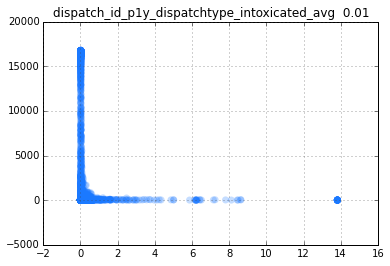

In [16]:
fig, ax = plt.subplots(subplot_kw=dict(axisbg='white'))

scatter = ax.scatter(inttable.distance,inttable['size'],
                    s = 50, alpha = 0.25, edgecolors = 'none', c = '#1B79FF')

ax.grid(color='#404040', linestyle='dotted')
ax.set_title(cfeat+"  "+ str(odist), size=12)

tdist = [round(item,2) for item in inttable.distance]

labels = zip(list(inttable.intfeat),tdist,list(inttable['size']))
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.enable_notebook()